In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")


In [79]:
data=pd.read_csv("Housing.csv")

In [81]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [82]:
df=data.loc[:,['area','price']]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [83]:
#rescaling the variable
df_columns=df.columns
scaler=MinMaxScaler()
df=scaler.fit_transform(df)
#rename the column
df=pd.DataFrame(df)
df.columns=df_columns
df.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


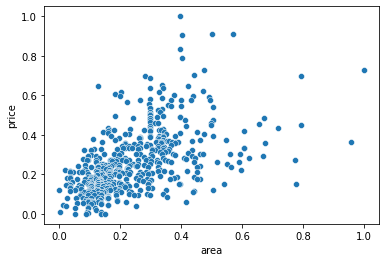

In [84]:
sns.scatterplot(x="area",y="price",data=df)

In [85]:
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=110)
df_train.shape,df_test.shape

((381, 2), (164, 2))

In [86]:
x_train=df_train["area"]
x_train=x_train.values.reshape(-1,1)
y_train=df_train["price"]
x_test=df_test["area"]
x_test=x_test.values.reshape(-1,1)
y_test=df_test["price"]

In [87]:
degrees=[1,2,3,6,10,20]

In [88]:
y_train_pred=np.zeros((len(x_train),len(degrees)))
y_test_pred=np.zeros((len(x_test),len(degrees)))

In [89]:
 for i,degree in enumerate(degrees):
   model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
   model.fit(x_train,y_train)
   y_train_pred[:,i]=model.predict(x_train)
   y_test_pred[:,i]=model.predict(x_test)

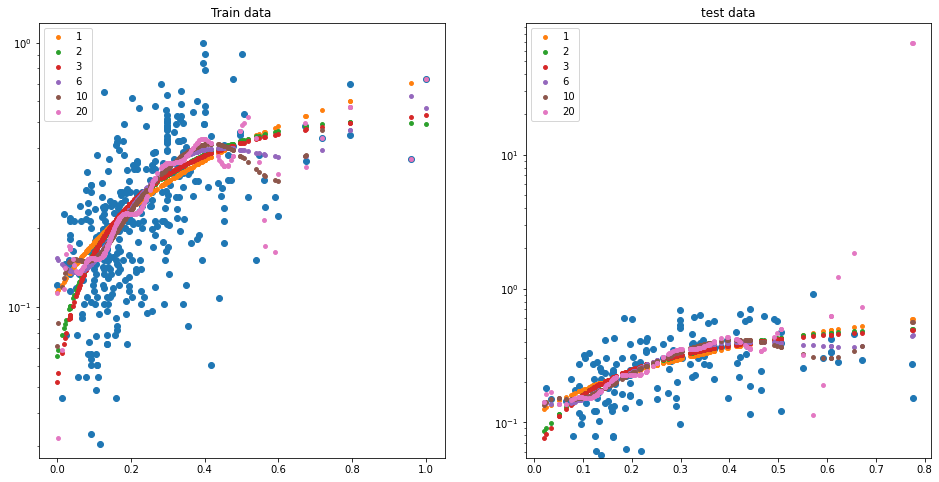

In [95]:
plt.figure(figsize=(16,8))
#train_data
plt.subplot(121)
plt.scatter(x_train,y_train)
plt.yscale("log")
plt.title("Train data")
for i, degree in enumerate(degrees):
  plt.scatter(x_train,y_train_pred[:,i],s=15,label=str(degree))
  plt.legend(loc="upperleft")
#test data
plt.subplot(122)
plt.scatter(x_test,y_test)
plt.yscale("log")
plt.title("test data")
for i,degree in enumerate(degrees):
  plt.scatter(x_test,y_test_pred[:,i],s=15,label=str(degree))
  plt.legend(loc="upper left")


In [102]:
print("R-squared values:\n")
for i ,degree in enumerate(degrees):
  train_r2=round(sklearn.metrics.r2_score(y_train,y_train_pred[:,i]),2)
  test_r2=round(sklearn.metrics.r2_score(y_test,y_test_pred[:,i]),2)
  print("Ploynomial degree {0}:train score={1},test score={2}".format(degree,train_r2,test_r2))


R-squared values:

Ploynomial degree 1:train score=0.31,test score=0.23
Ploynomial degree 2:train score=0.33,test score=0.28
Ploynomial degree 3:train score=0.33,test score=0.29
Ploynomial degree 6:train score=0.36,test score=0.31
Ploynomial degree 10:train score=0.37,test score=0.26
Ploynomial degree 20:train score=0.4,test score=-2086.48


In [ ]:
#hence result as the  degree of x is increasing  performence of model decreasing